In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # IMDB 데이터셋 로드하기, num_words=10000로 훈련데이터에서 가장 자주 나타나는 단어 1만개만 사용

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data]) # 단어 인덱스는 만개를 넘지 않음

9999

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) # 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32") # 레이블 리스트를 벡터로 변환

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
]) # 모델 정의

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"]) # 모델 컴파일하기

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:] # 검증 세트 준비하기

In [12]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val)) # 모델 훈련하기

Epoch 1/20


30/30 [==============================] - 9s 225ms/step - loss: 0.5397 - accuracy: 0.7818 - val_loss: 0.4089 - val_accuracy: 0.8651
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3377 - accuracy: 0.8909 - val_loss: 0.3199 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2487 - accuracy: 0.9163 - val_loss: 0.3392 - val_accuracy: 0.8585
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2037 - accuracy: 0.9304 - val_loss: 0.2784 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1677 - accuracy: 0.9443 - val_loss: 0.2772 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1419 - accuracy: 0.9539 - val_loss: 0.3102 - val_accuracy: 0.8774
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1241 - accuracy: 0.9595 - val_loss: 0.2968 - val_accuracy: 0.8826
Epoch 8/20

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

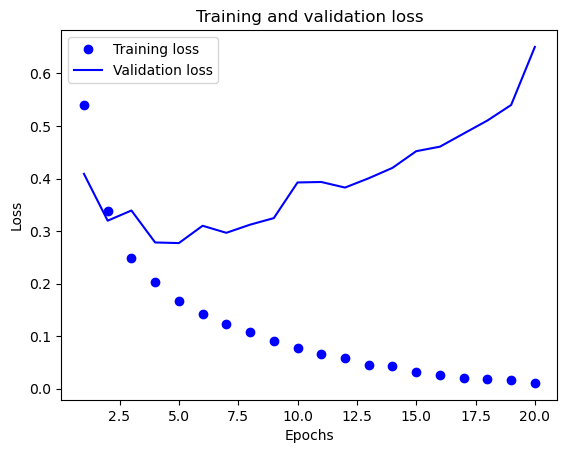

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show() # 훈련과 검증 손실 그리기

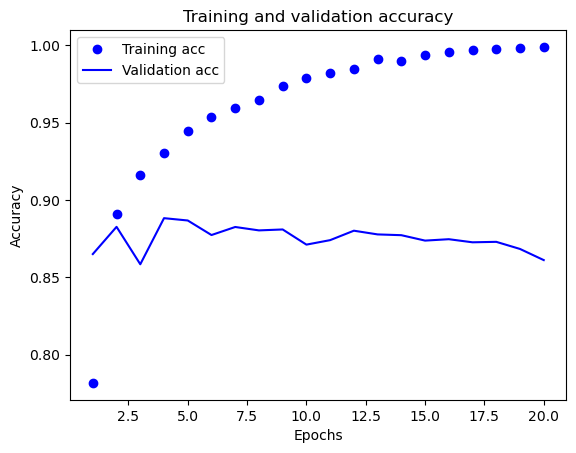

In [15]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() # 훈련과 검증 정확도 그리기

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) # 모델을 처음부터 다시 훈련

Epoch 1/4
49/49 [==============================] - 3s 18ms/step - loss: 0.4630 - accuracy: 0.8174
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2732 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2160 - accuracy: 0.9210
Epoch 4/4
782/782 [==============================] - 6s 6ms/step - loss: 0.2900 - accuracy: 0.8842


In [17]:
# 이제부터 추가 싷험이다

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) # 모델을 처음부터 다시 훈련 (표현층이 한개다) -> 정확도가 살짝 오름

Epoch 1/4
49/49 [==============================] - 3s 20ms/step - loss: 0.4726 - accuracy: 0.8185
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.3051 - accuracy: 0.8964
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2465 - accuracy: 0.9140
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.2780 - accuracy: 0.8890


In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) # 모델을 처음부터 다시 훈련 (표현층이 세개다) -> 정확도가 내려감

Epoch 1/4
49/49 [==============================] - 3s 18ms/step - loss: 0.4874 - accuracy: 0.8108
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2754 - accuracy: 0.8998
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2129 - accuracy: 0.9216
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.3057 - accuracy: 0.8807


In [20]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) # 모델을 처음부터 다시 훈련 (층의 유닛 추가) -> 정확도 내려감

Epoch 1/4
49/49 [==============================] - 3s 19ms/step - loss: 0.4497 - accuracy: 0.8092
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2654 - accuracy: 0.9010
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2068 - accuracy: 0.9229
Epoch 4/4
782/782 [==============================] - 5s 5ms/step - loss: 0.3039 - accuracy: 0.8804


In [21]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) # 모델을 처음부터 다시 훈련 (층의 유닛 추가) -> 정확도 하락

Epoch 1/4
49/49 [==============================] - 3s 28ms/step - loss: 0.4349 - accuracy: 0.8098
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2673 - accuracy: 0.8963
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2118 - accuracy: 0.9178
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.3430 - accuracy: 0.8687


In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) # 모델을 처음부터 다시 훈련 (mse 손실함수 사용) -> 정확도 상승

Epoch 1/4
49/49 [==============================] - 3s 17ms/step - loss: 0.1621 - accuracy: 0.8070
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.0920 - accuracy: 0.8972
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.0702 - accuracy: 0.9166
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.0912 - accuracy: 0.8774


In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) # 모델을 처음부터 다시 훈련 (tanh 활성화 함수 사용) -> 정확도 하락

Epoch 1/4
49/49 [==============================] - 3s 16ms/step - loss: 0.4455 - accuracy: 0.8239
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2560 - accuracy: 0.9065
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1994 - accuracy: 0.9261
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.3011 - accuracy: 0.8810
